#### Loading and Inspecting the Data

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# Load the dataset
Crop_recommendation = pd.read_csv("./crop_recommendation_clusters.csv")

In [6]:
# Display the dataset
Crop_recommendation

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
# Display dimensions
Crop_recommendation.shape

(2200, 8)

In [8]:
# Display descriptive statistics
Crop_recommendation.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Get the summary of the dataset
Crop_recommendation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Data Cleaning

In [10]:
# Check for missing values
Crop_recommendation.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
# Check for duplicate values 
Crop_recommendation.duplicated().sum()

0

#### Data Pre-Processing

In [12]:
# Rename columns
Crop_recommendation.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [13]:
Crop_recommendation.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### Data Visualization and Summary Insights

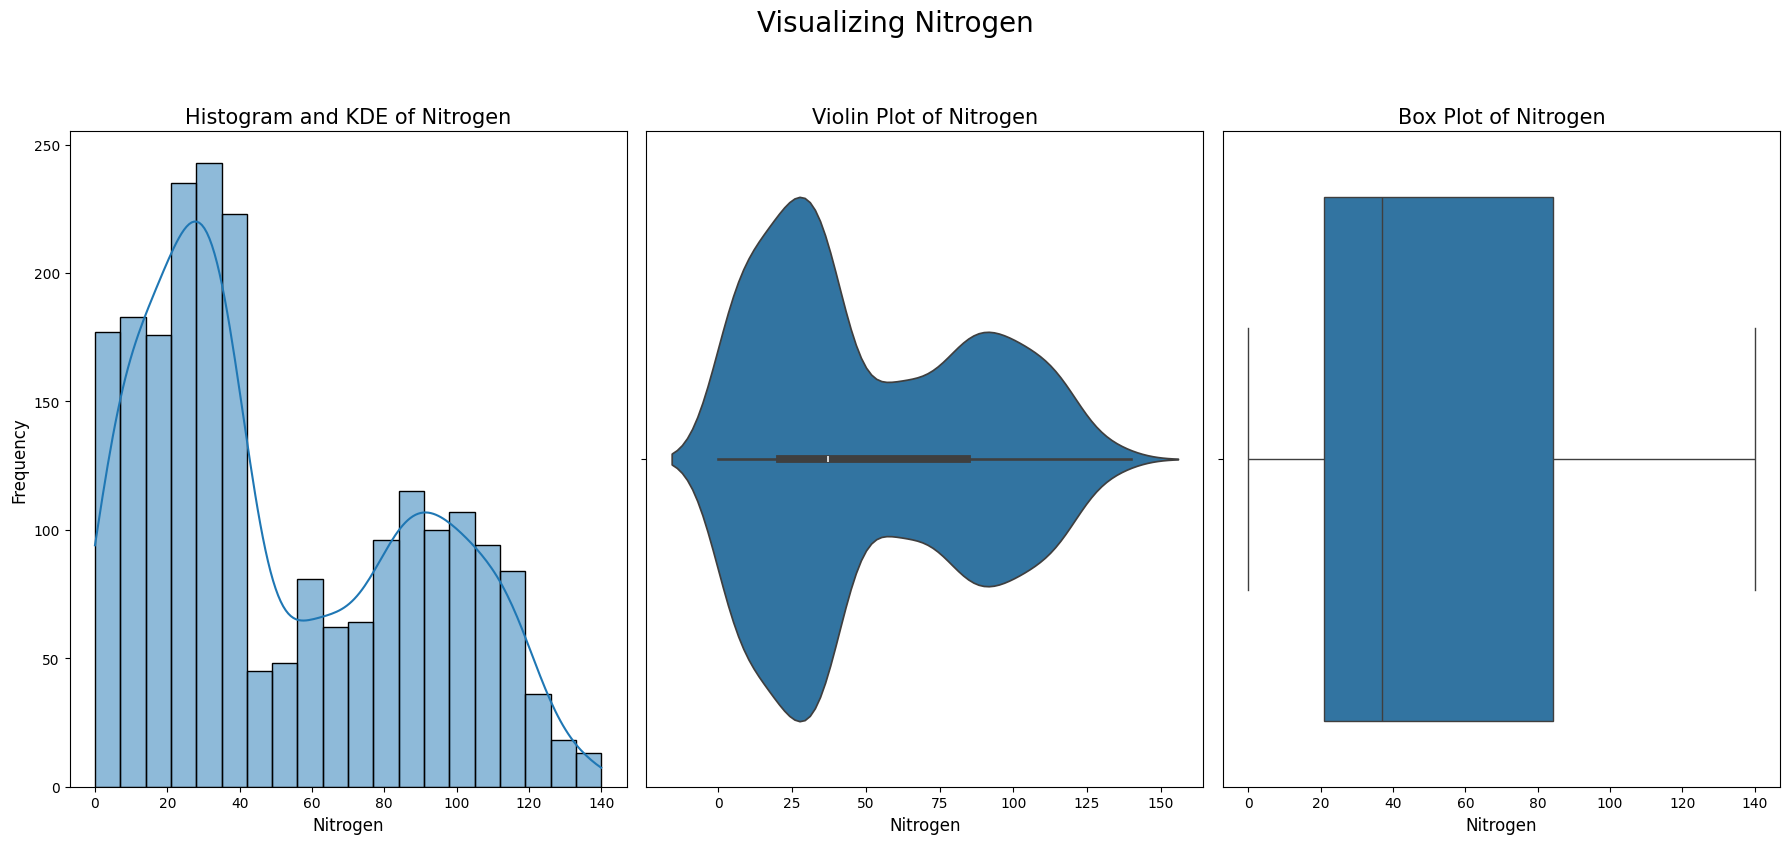

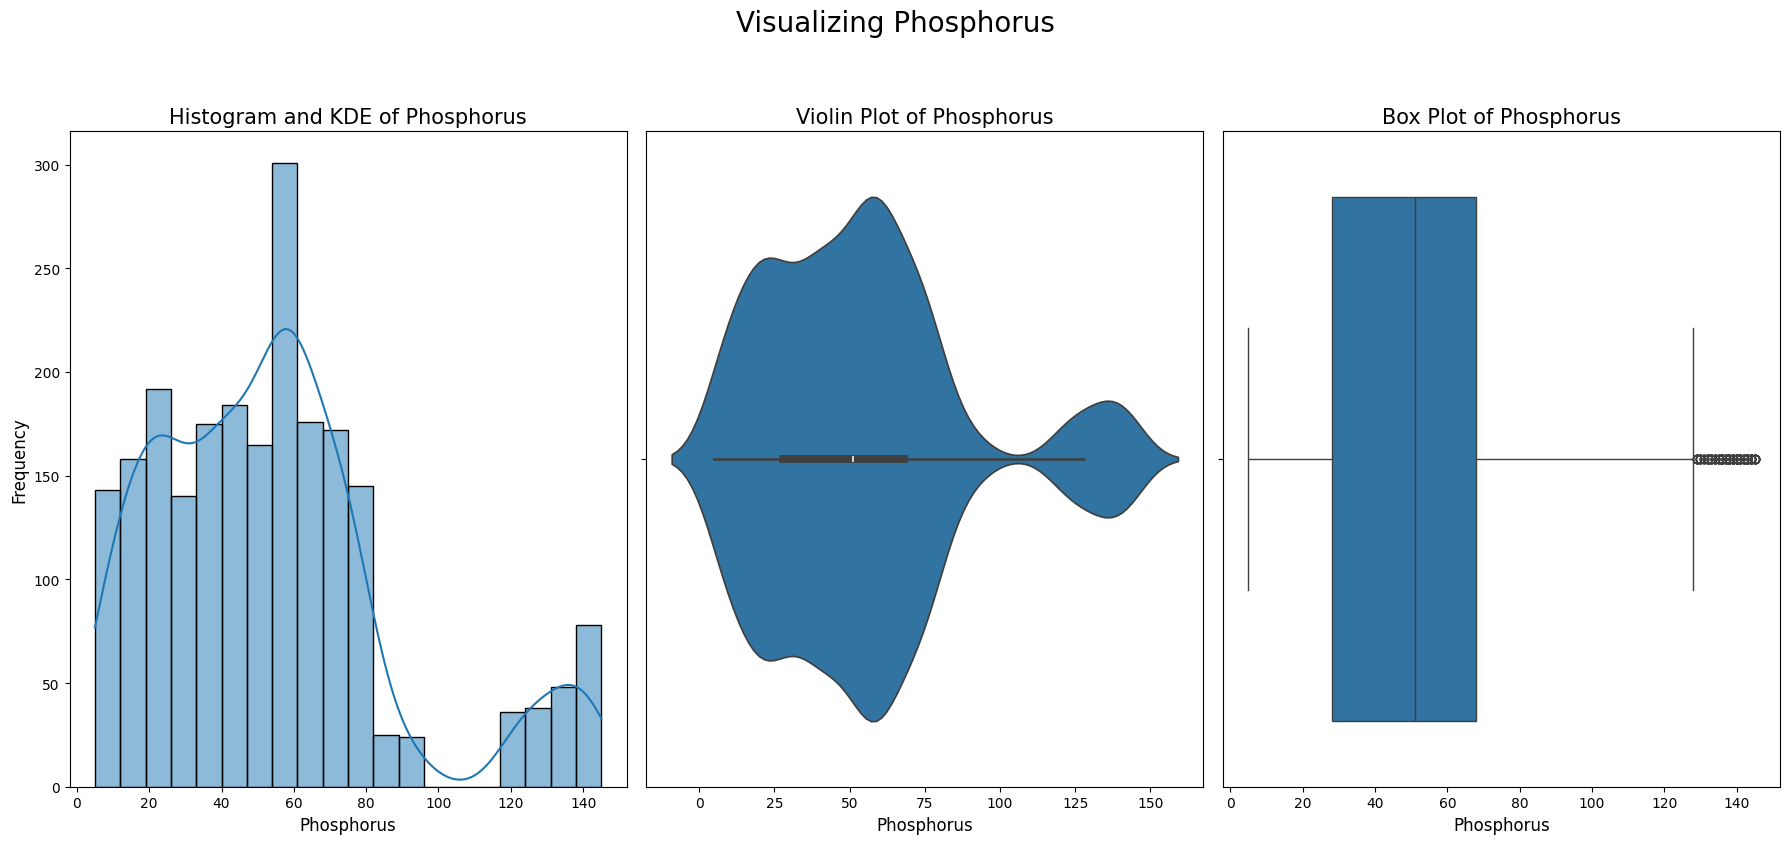

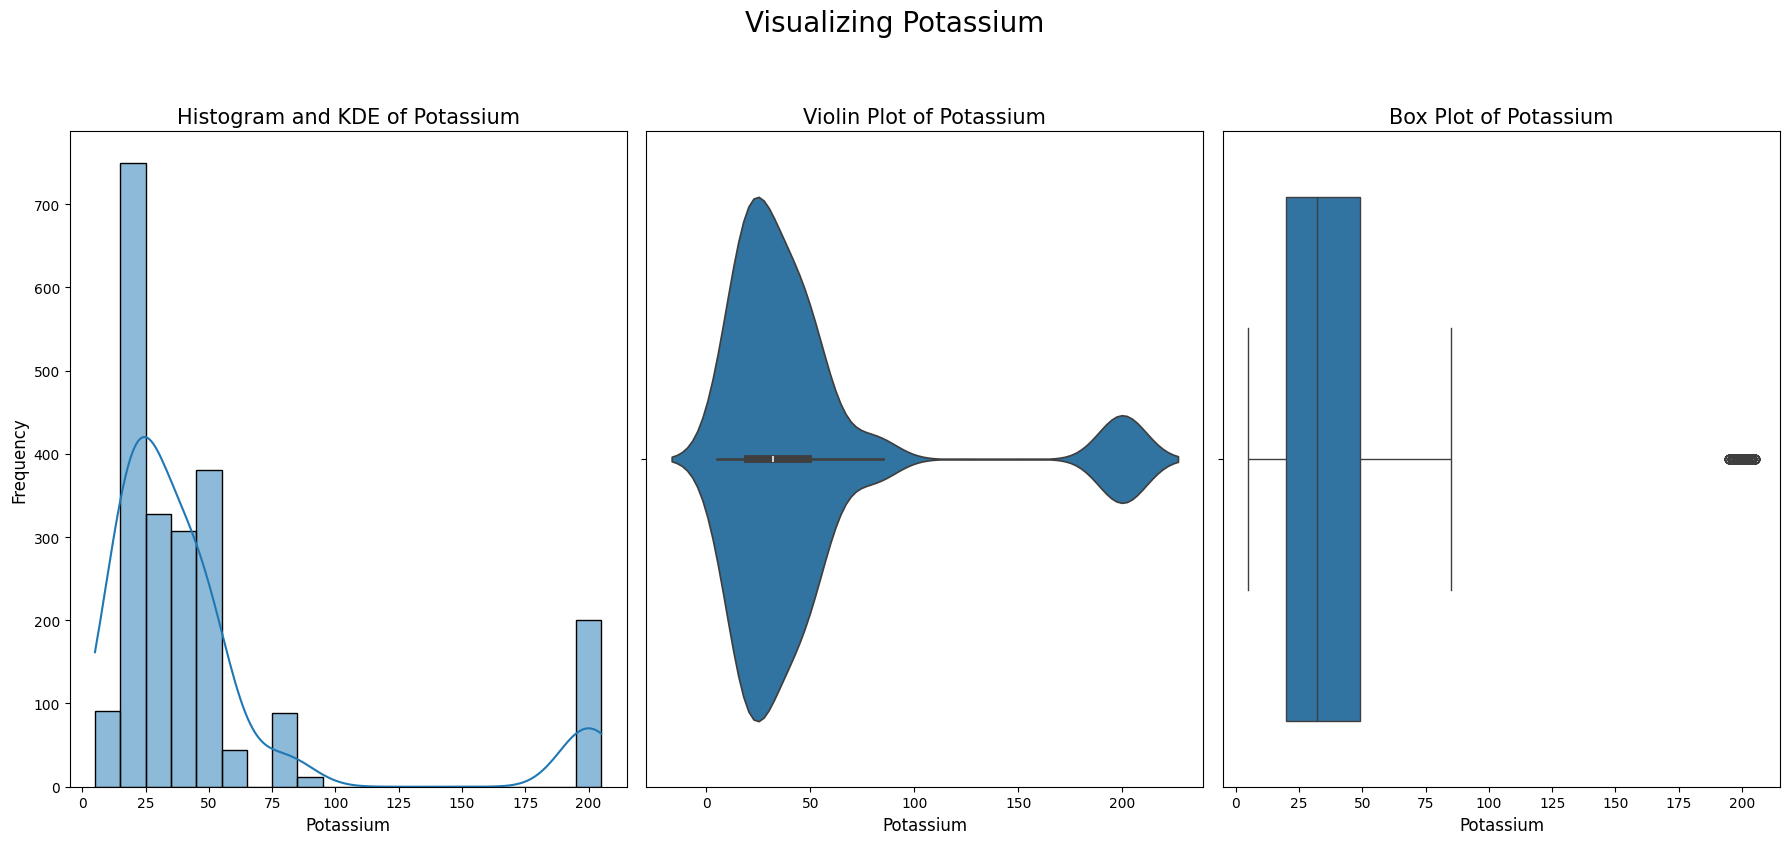

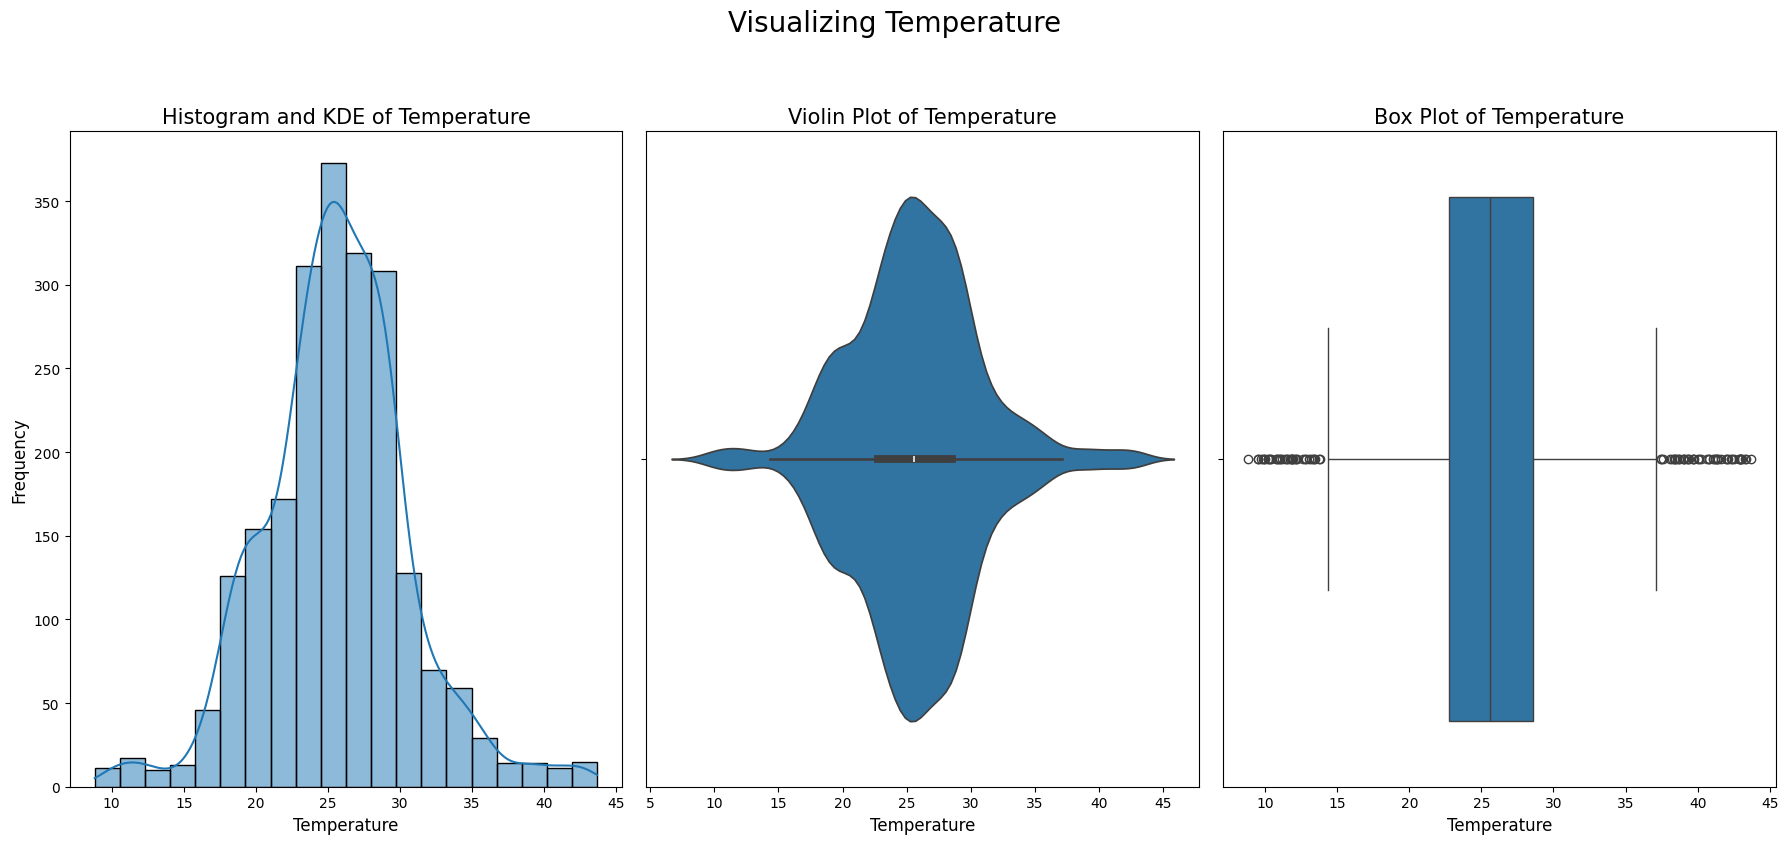

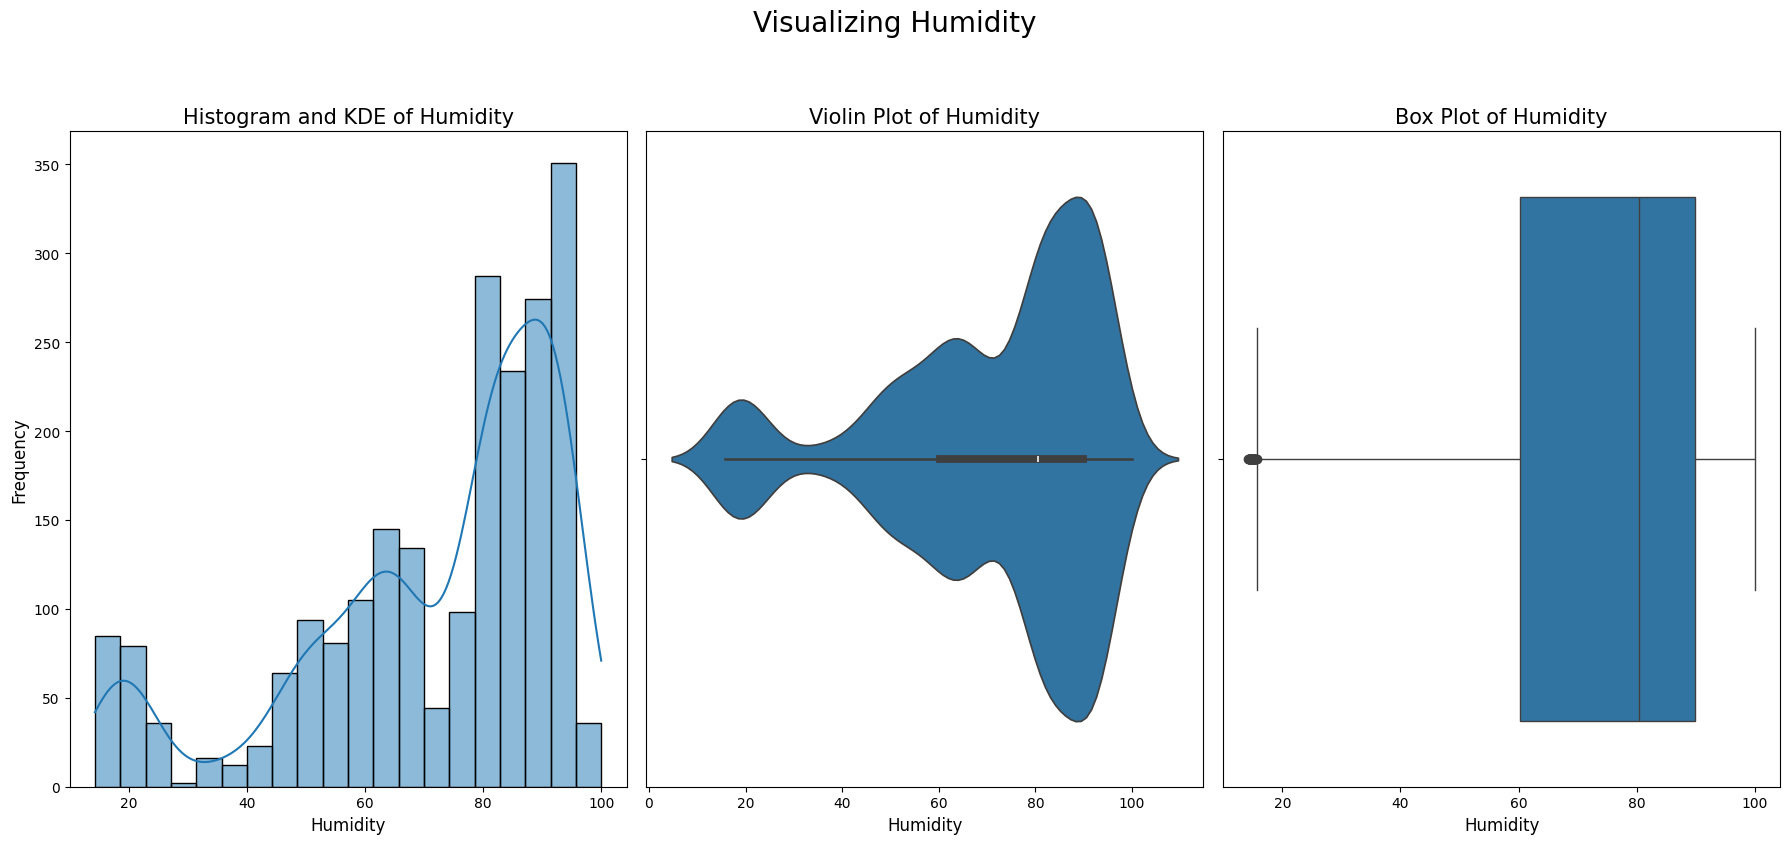

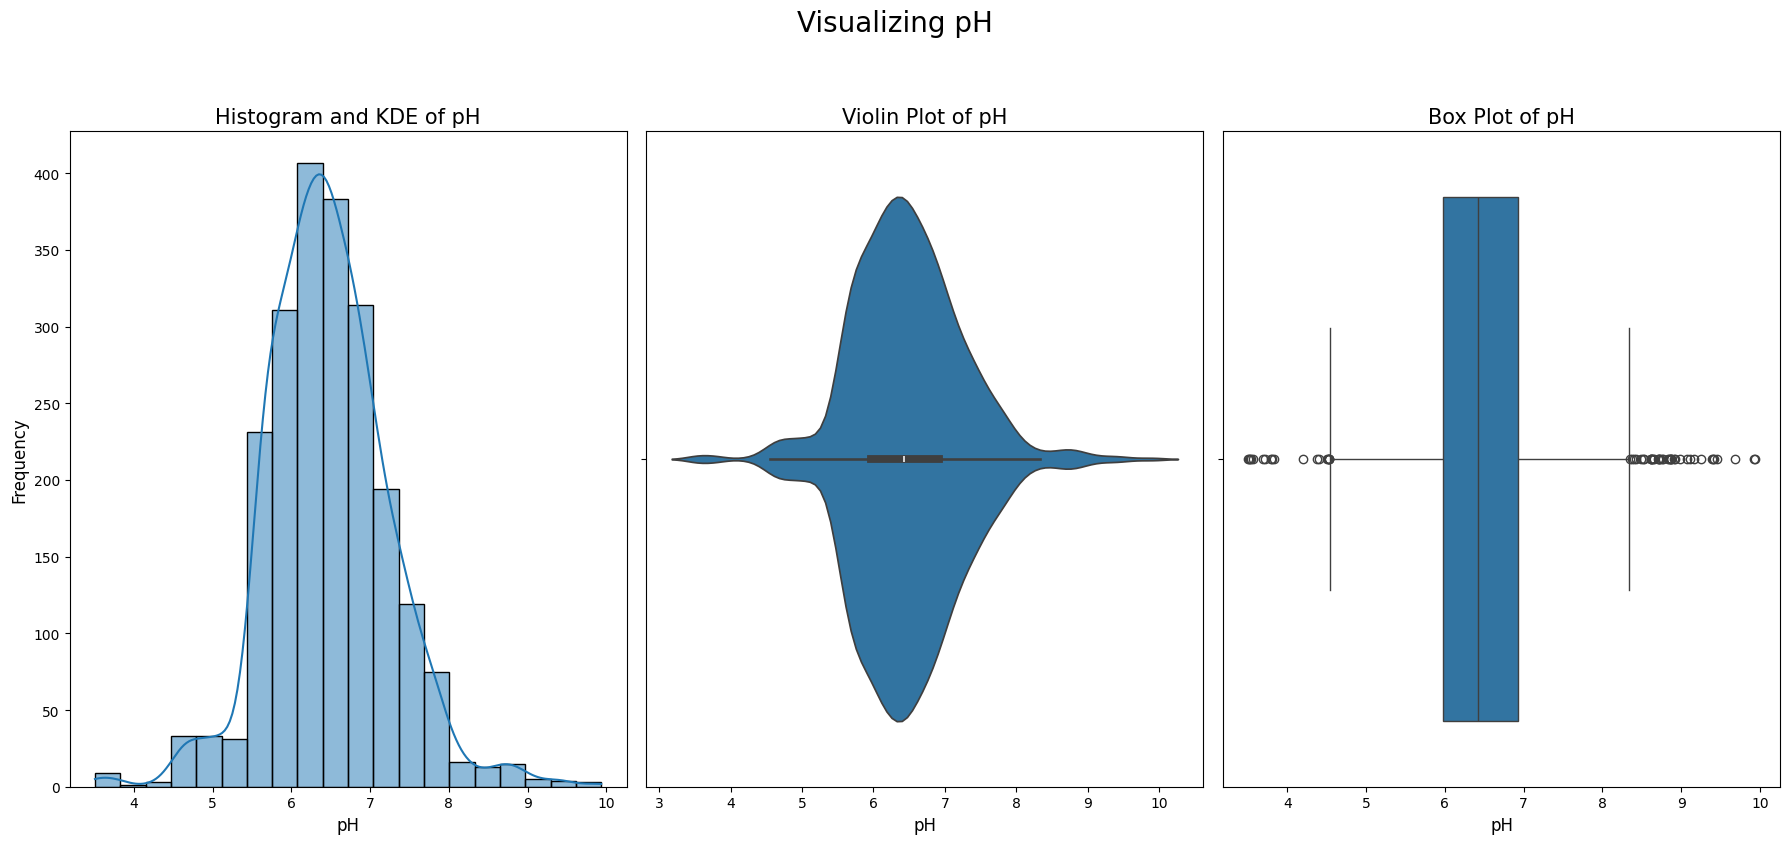

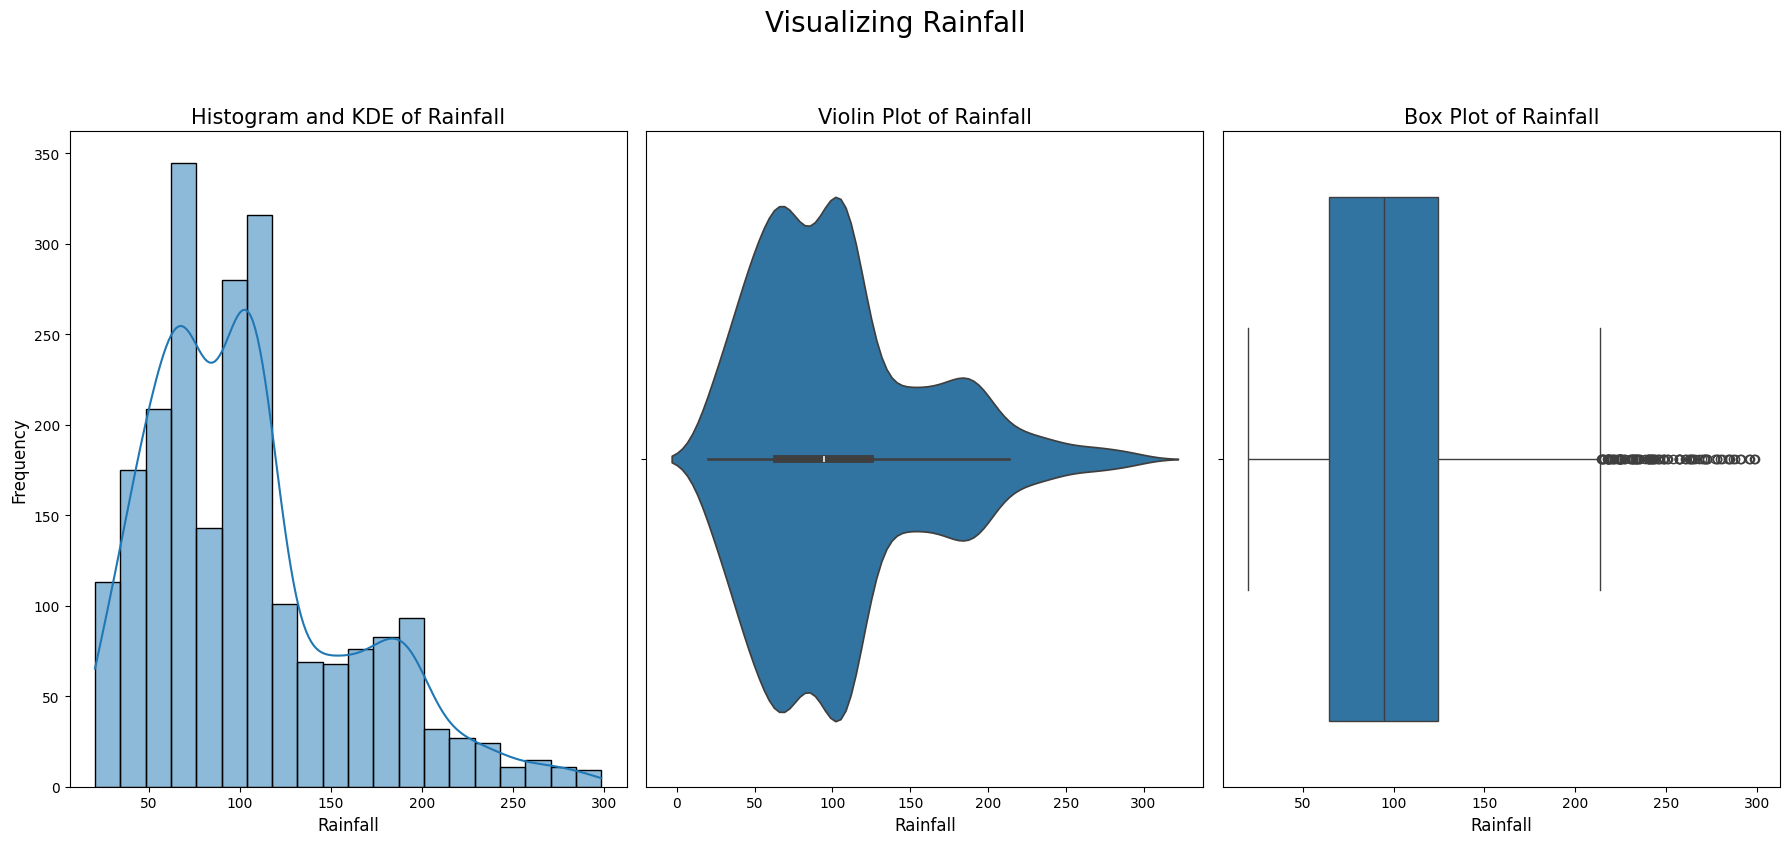

In [14]:
# Loop through each column except the last one
for i in Crop_recommendation.columns[:-1]:
    fig, ax = plt.subplots(1, 3, figsize=(18, 8))
    
    # Histogram with KDE
    sns.histplot(data=Crop_recommendation, x=i, kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f'Histogram and KDE of {i}', fontsize=15)
    ax[0].set_xlabel(i, fontsize=12)
    ax[0].set_ylabel('Frequency', fontsize=12)
    
    # Violin plot
    sns.violinplot(data=Crop_recommendation, x=i, ax=ax[1])
    ax[1].set_title(f'Violin Plot of {i}', fontsize=15)
    ax[1].set_xlabel(i, fontsize=12)
    
    # Box plot
    sns.boxplot(data=Crop_recommendation, x=i, ax=ax[2])
    ax[2].set_title(f'Box Plot of {i}', fontsize=15)
    ax[2].set_xlabel(i, fontsize=12)
    
    # Adjust the overall title and layout
    plt.suptitle(f'Visualizing {i}', size=20, y=1.05)
    plt.tight_layout()
    plt.show()


In [15]:
# Group by 'Label' and calculate the mean for each group
grouped = Crop_recommendation.groupby(by='Label').mean().reset_index()
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


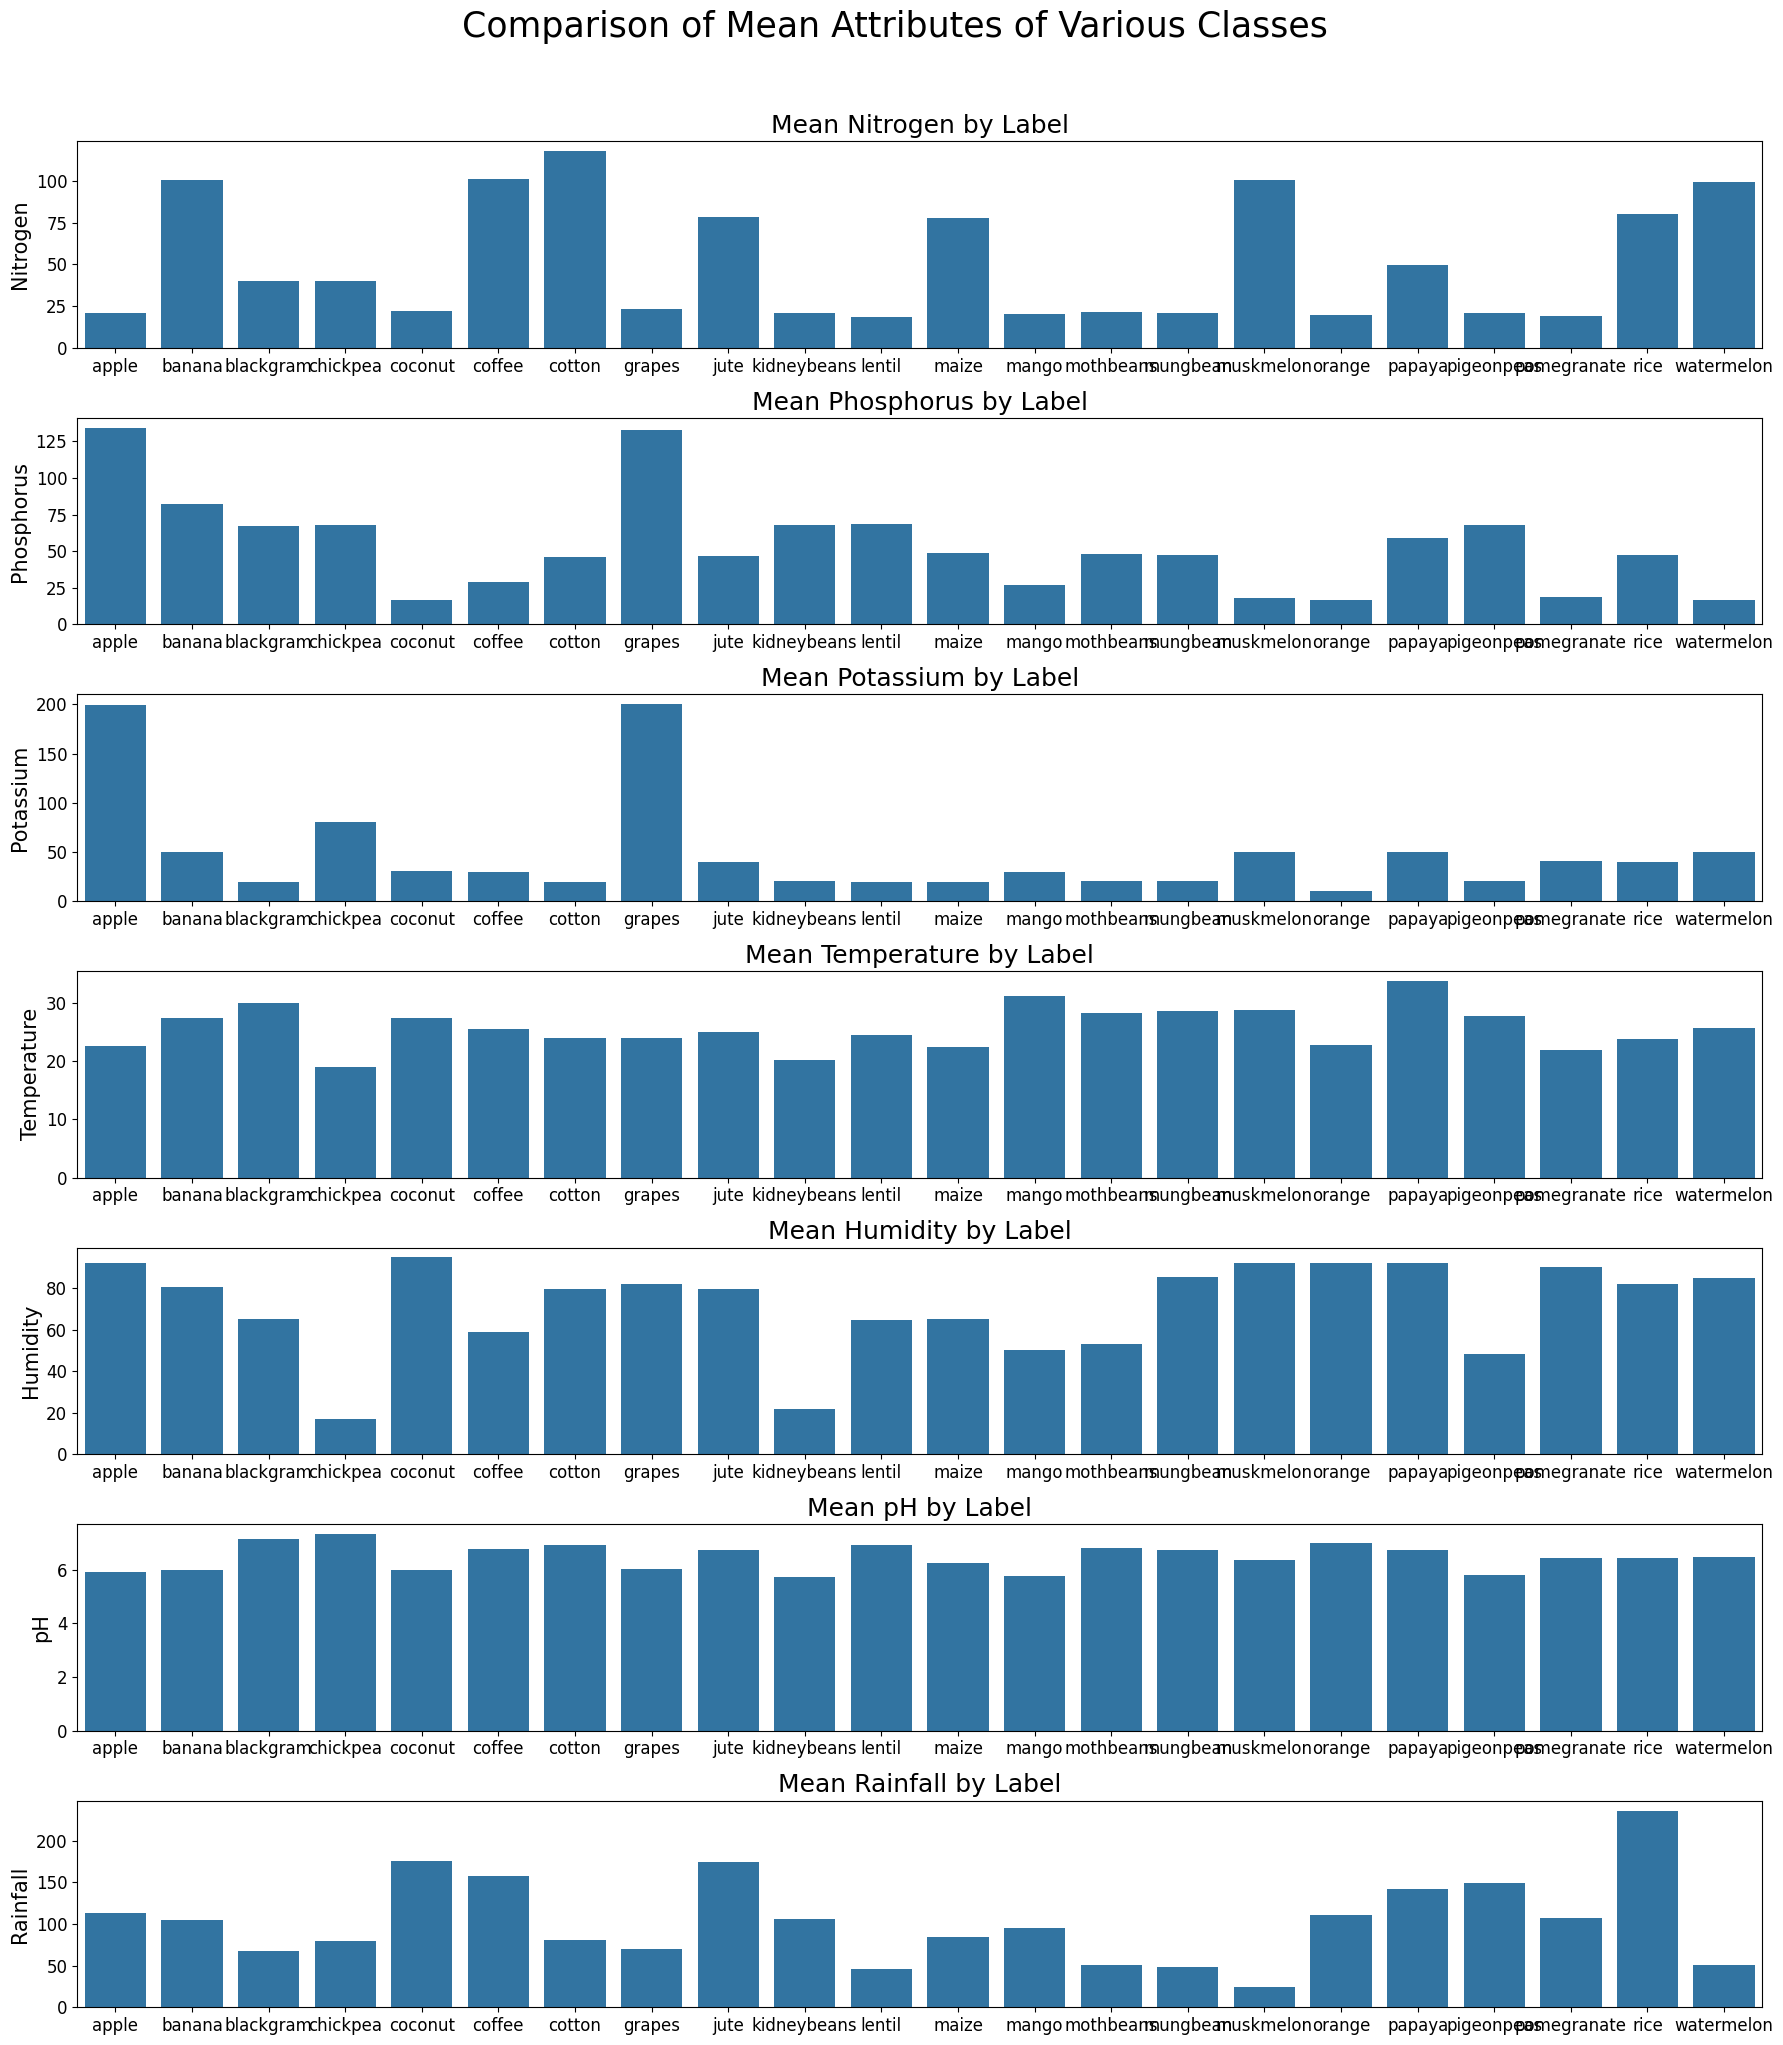

In [16]:
# Create the subplots with the specified figure size
fig, ax = plt.subplots(7, 1, figsize=(18, 20))

# Loop through each column except the first one
for index, i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped, x='Label', y=i, ax=ax[index])
    ax[index].set_title(f'Mean {i} by Label', fontsize=18)
    ax[index].set_xlabel('')
    ax[index].set_ylabel(i, fontsize=15)
    ax[index].tick_params(axis='x', labelsize=12)
    ax[index].tick_params(axis='y', labelsize=12)

# Adjust the overall title and layout
plt.suptitle("Comparison of Mean Attributes of Various Classes", size=25, y=1.02)
plt.tight_layout()
plt.show()


In [17]:
# Print top 5 crops by requirement for each column
for i in grouped.columns[1:]:
    print(f'Most {i}-Requiring Crops:')
    print(f'Crops : Values')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['Label',i]].values:
        print(f'{j} : {k}')
    print(f'')

Most Nitrogen-Requiring Crops:
Crops : Values
cotton : 117.77
coffee : 101.2
muskmelon : 100.32
banana : 100.23
watermelon : 99.42

Most Phosphorus-Requiring Crops:
Crops : Values
apple : 134.22
grapes : 132.53
banana : 82.01
lentil : 68.36
chickpea : 67.79

Most Potassium-Requiring Crops:
Crops : Values
grapes : 200.11
apple : 199.89
chickpea : 79.92
watermelon : 50.22
muskmelon : 50.08

Most Temperature-Requiring Crops:
Crops : Values
papaya : 33.7238587388
mango : 31.2087701513
blackgram : 29.9733396789
muskmelon : 28.663065756
mungbean : 28.5257747353

Most Humidity-Requiring Crops:
Crops : Values
coconut : 94.84427180610001
papaya : 92.4033876826
muskmelon : 92.34280196089999
apple : 92.3333828756
orange : 92.17020876340001

Most pH-Requiring Crops:
Crops : Values
chickpea : 7.33695662374
blackgram : 7.13395162948
orange : 7.01695745276
lentil : 6.927931571609999
cotton : 6.91267549578

Most Rainfall-Requiring Crops:
Crops : Values
rice : 236.18111359399998
coconut : 175.686645804

In [18]:
# Print bottom 5 crops by requirement for each column
for i in grouped.columns[1:]:
    print(f'Least {i}-Requiring Crops:')
    print(f'Crops : Values')
    for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} : {k}')
    print(f'')

Least Nitrogen-Requiring Crops:
Crops : Values
lentil : 18.77
pomegranate : 18.87
orange : 19.58
mango : 20.07
pigeonpeas : 20.73

Least Phosphorus-Requiring Crops:
Crops : Values
orange : 16.55
coconut : 16.93
watermelon : 17.0
muskmelon : 17.72
pomegranate : 18.75

Least Potassium-Requiring Crops:
Crops : Values
orange : 10.01
blackgram : 19.24
lentil : 19.41
cotton : 19.56
maize : 19.79

Least Temperature-Requiring Crops:
Crops : Values
chickpea : 18.8728467519
kidneybeans : 20.1150846851
pomegranate : 21.837841721999997
maize : 22.3892039102
apple : 22.6309424132

Least Humidity-Requiring Crops:
Crops : Values
chickpea : 16.8604394237
kidneybeans : 21.6053567295
pigeonpeas : 48.0616330847
mango : 50.1565726953
mothbeans : 53.16041802790001

Least pH-Requiring Crops:
Crops : Values
kidneybeans : 5.749410585870001
mango : 5.766372799660001
pigeonpeas : 5.794174879790001
apple : 5.929662931809999
coconut : 5.97656212619

Least Rainfall-Requiring Crops:
Crops : Values
muskmelon : 24.68

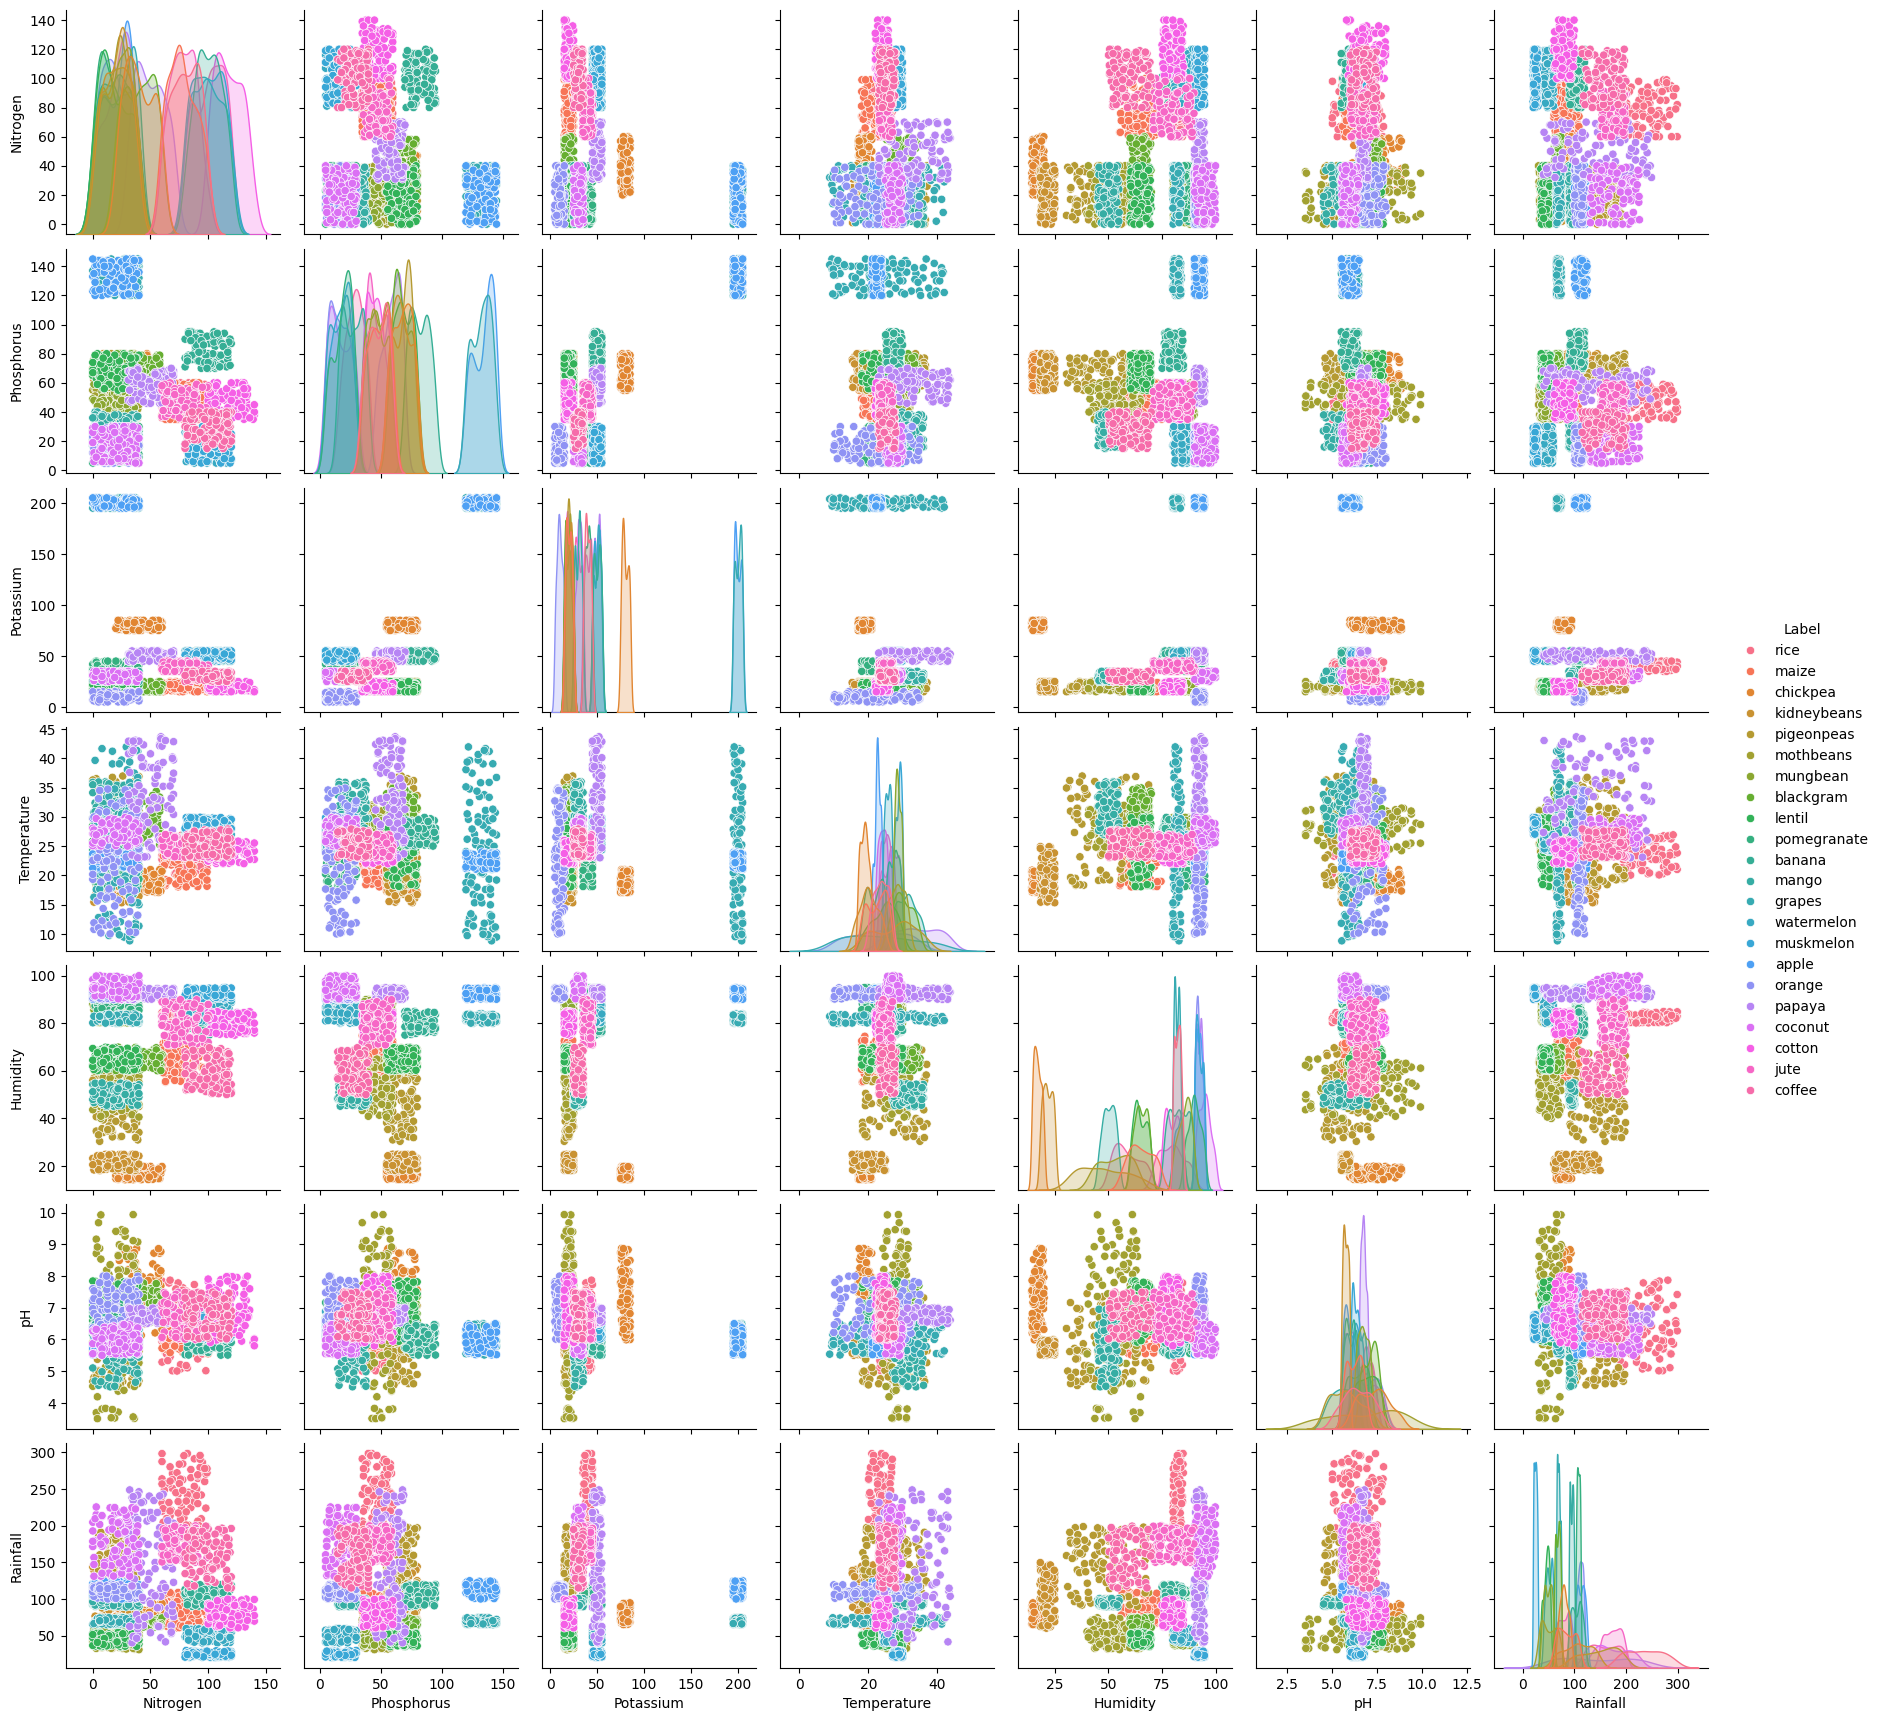

In [19]:
# Plot pairwise relationships colored by 'Label'
sns.pairplot(data=Crop_recommendation,hue='Label')
plt.show()

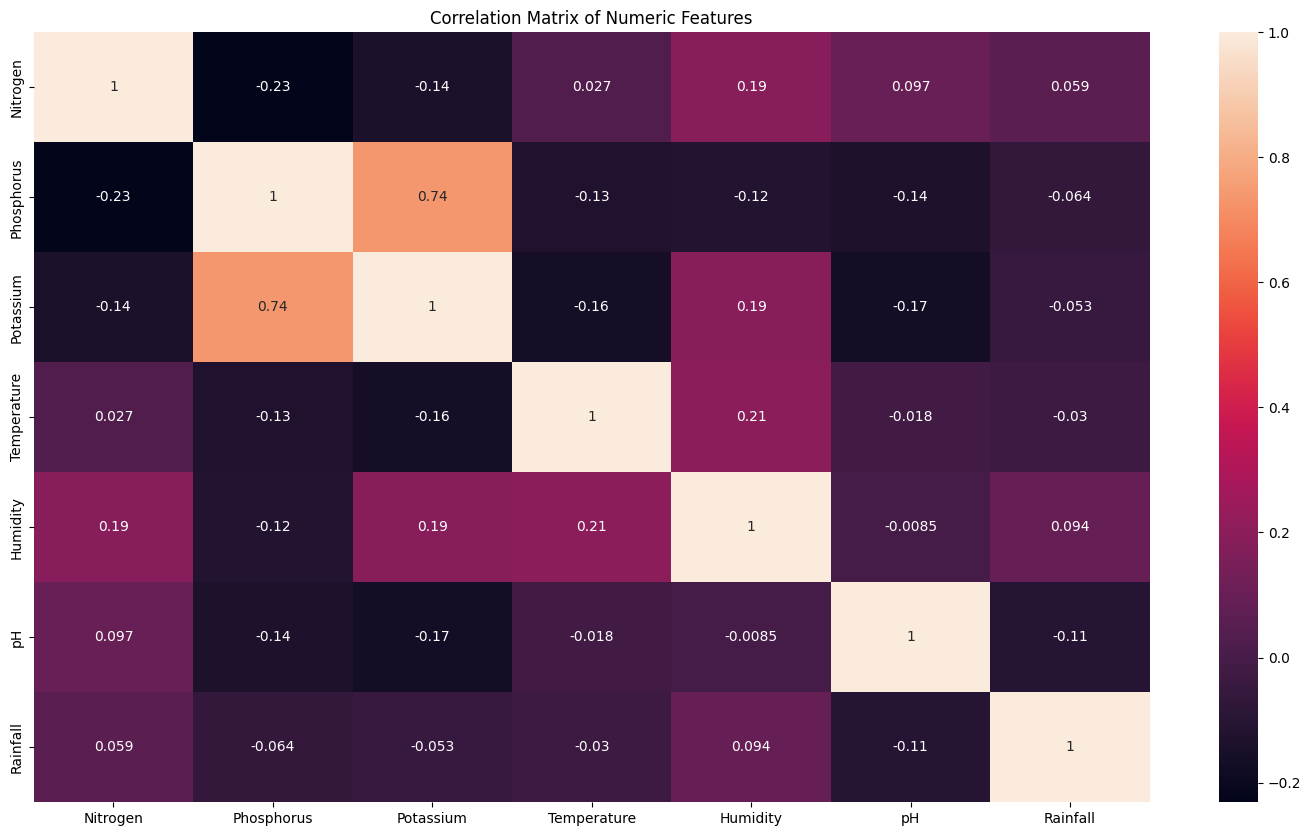

In [20]:
# Visualizing correlation matrix of numeric features
numeric_data = Crop_recommendation.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#### Gradient Boosting Classifier Implementation and Evaluation

In [21]:
# Get unique values in the 'Label' column
names = Crop_recommendation['Label'].unique()

In [22]:
# Encode 'Label' column with numerical values
encoder=LabelEncoder()
Crop_recommendation['Label']=encoder.fit_transform(Crop_recommendation['Label'])
Crop_recommendation.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [23]:
# Split the dataset into features (X) and target (y)
X=Crop_recommendation.drop(['Label'],axis=1)
y=Crop_recommendation['Label']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

In [25]:
# Standardize the training features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [26]:
# Standardize the test features
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


Text(195.72222222222223, 0.5, 'Actual')

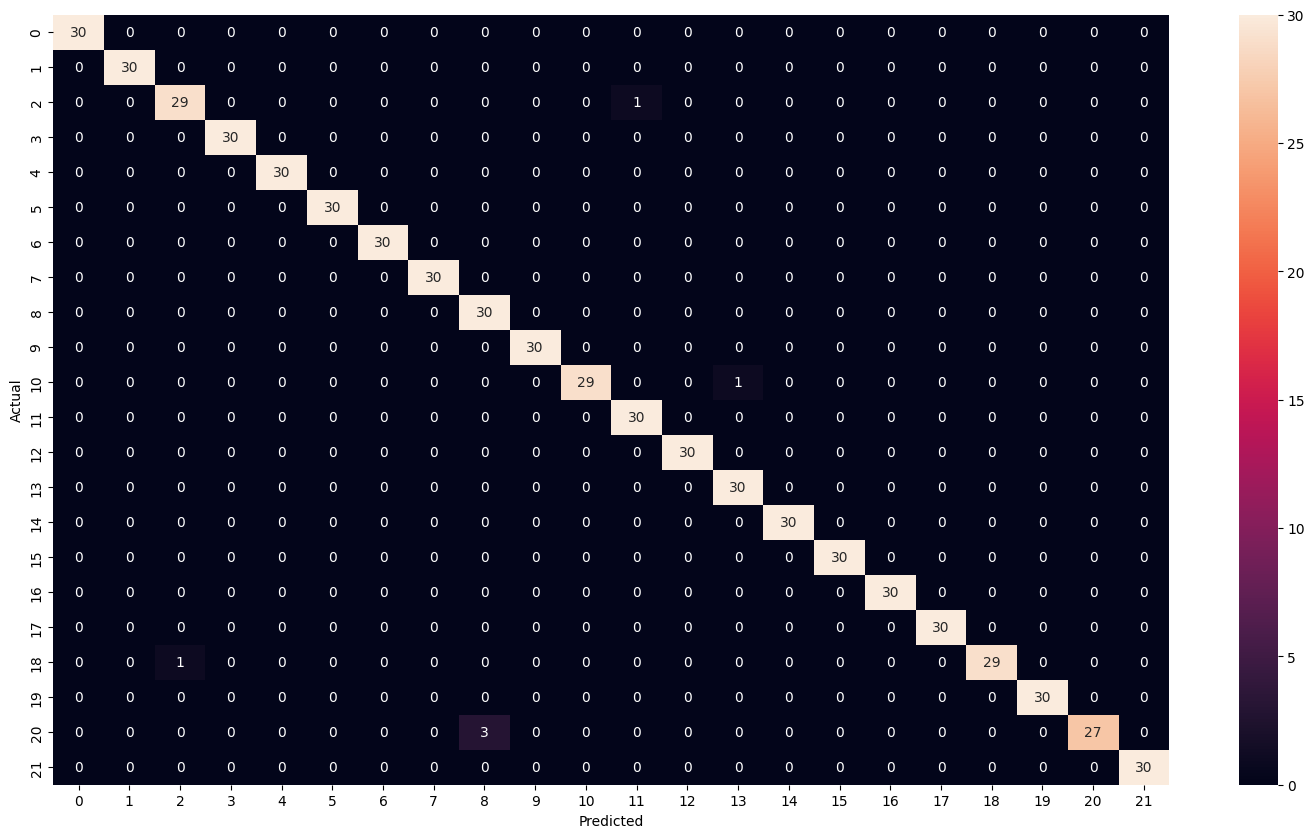

In [29]:
# Perform RandomizedSearchCV for hyperparameter tuning of Gradient Boosting Classifier and plot the confusion matrix
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(18,10))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
# Print classification report for Gradient Boosting Classifier
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      0.97      0.97        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.91      1.00      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    